In [1]:
%run profile

In [26]:
battle = pd.read_csv('train_V2.csv')

In [27]:
battle = battle[battle['winPlacePerc']>=0] #4446965행, NA제거

In [28]:
battle = battle[battle['matchType'].isin(['solo','solo-fpp'])]

In [144]:
# 이상치 제거
# 걷지 않고 무기 사용
walk0 = battle[battle.walkDistance==0]
wphack=walk0[walk0.weaponsAcquired>0]
battle=battle.drop(wphack.index)
# 걷지 않고 킬
walk0 = battle[battle.walkDistance==0]
killhack = walk0[walk0.kills>0]
battle = battle.drop(killhack.index)
# 걷지 않고 부스트
walk0 = battle[battle.walkDistance==0]
boostshack = walk0[walk0.boosts>0]
battle = battle.drop(boostshack.index)
# 걷지 않고 데미지
walk0 = battle[battle.walkDistance==0]
damagehack = walk0[walk0.damageDealt>0]
battle = battle.drop(damagehack.index)
# 걷지 않고 어시스트
walk0 = battle[battle.walkDistance==0]
assistshack = walk0[walk0.assists>0]
battle=battle.drop(assistshack.index)
# 걷지 않고 기절
walk0 = battle[battle.walkDistance==0]
DBNOshack = walk0[walk0.DBNOs>0]
battle = battle.drop(DBNOshack.index)
# 걷지 않고 로드킬
ride0 = battle[battle.rideDistance==0]
roadkillhack = ride0[ride0.roadKills>0]
battle = battle.drop(roadkillhack.index)

In [145]:
solo = battle[['kills','walkDistance','heals','boosts','weaponsAcquired','winPlacePerc']]

In [183]:
solo_sort_desc = solo.sort_values('winPlacePerc', ascending=False)

In [184]:
# 상위10%
desc70000 = solo_sort_desc.iloc[0:140000,:]

In [185]:
d7m = desc70000.mean()

In [186]:
d7m = DataFrame(d7m)

In [187]:
solo_sort_asc = solo.sort_values('winPlacePerc', ascending=True)

In [188]:
# 하위50%
asc350000 = solo_sort_asc.iloc[175000:350000,:]

In [189]:
a7m = asc350000.mean()

In [190]:
a7m = DataFrame(a7m)

In [191]:
total = d7m

In [192]:
total['asc'] = a7m[0]

In [193]:
total.columns= ['desc', 'asc']

In [194]:
total

,desc,asc
kills,2.321879,0.527137
walkDistance,2444.501505,342.797801
heals,2.782971,0.371794
boosts,3.374150,0.255434
weaponsAcquired,5.447971,3.064594
winPlacePerc,0.905447,0.362911


In [195]:
total2 = DataFrame(total['desc'] / (total['desc'] + total['asc']))

In [196]:
total2['asc'] = DataFrame(total['asc'] / (total['desc'] + total['asc']))

In [197]:
total2.columns = ['desc', 'asc']

In [198]:
total3 = total2.drop('winPlacePerc')

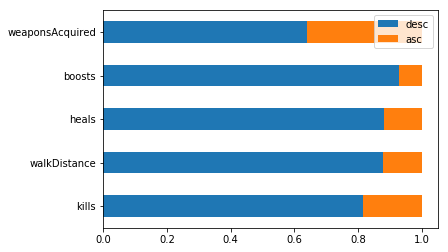

In [199]:
total3.plot(kind='barh', stacked=True)